# Monte Carlo Simulation

Exercise: The following simulations are for photons in water. The number of electrons per volume unit in
water is nV = 3.43×1023 cm-3. We assume that the only interaction taking place is Compton scattering.
The minimum and maximum photon energy may be set to 50 and 2000 keV.

1. Create attenuation coefficient function.

<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:49: SyntaxWarning: invalid escape sequence '\m'
<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:49: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sq/czqm3zt15lb2_07cs887bdnw0000gn/T/ipykernel_24482/4293899636.py:31: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma $, cm$^{2}$')
/var/folders/sq/czqm3zt15lb2_07cs887bdnw0000gn/T/ipykernel_24482/4293899636.py:49: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mu$, cm$^{-1}$')


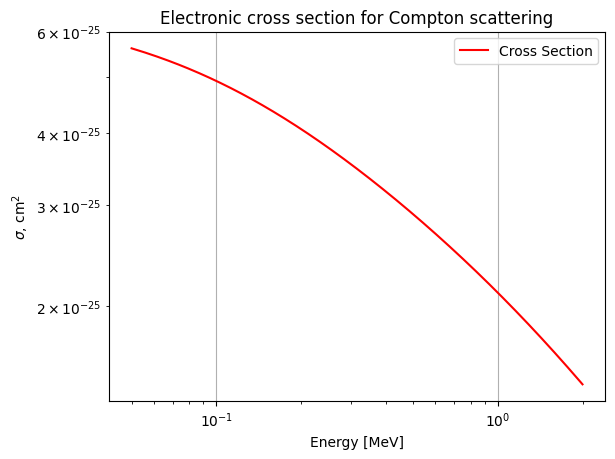

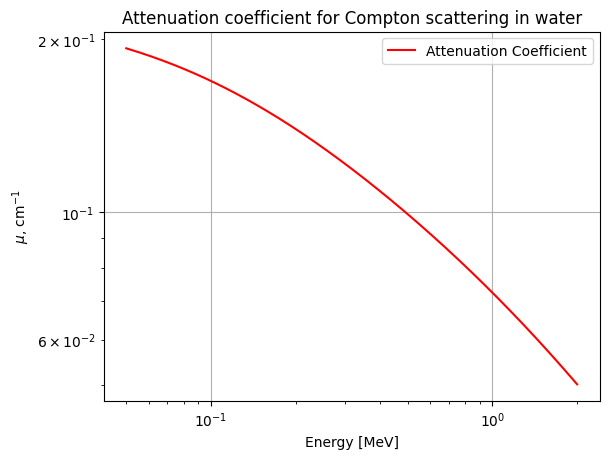

Attenuation coefficient at 0.2 MeV (200 keV): 0.13943 cm^-1
Attenuation coefficient at 2 MeV: 0.05020 cm^-1
Calculated mu for 0.2 MeV (200 keV): 0.139 cm^-1
Published mu for 0.2 MeV: 0.137 cm^-1
Difference: 0.002 cm^-1

Calculated mu for 2 MeV: 0.050 cm^-1
Published mu for 2 MeV: 0.049 cm^-1
Difference: 0.001 cm^-1


In [1]:
#1. Create attenuation coefficient function
import numpy as np
import matplotlib.pyplot as plt

#Constants
nv = 3.43e23  #Number of electrons per volume unit in water [cm^-3]
m_0_c2 = 0.511  #Electron rest mass [MeV]
r0 = 2.818e-13  #Electron radius [cm]

#Photon energies range in [MeV]
energies_MeV = np.linspace(0.05, 2.0, 1000)  # Energies in MeV, 50 keV to 2000 keV

#Calculate alpha
def alpha(E):
    return E / m_0_c2  #hv expressed in MeV

#Defining the electronic cross-section for Compton scattering, using eq. 7.15 in Attix
def cross_section(E):
    a = alpha(E)
    term1 = ((1 + a) / a**2) * (2 * (1 + a) / (1 + 2 * a) - np.log(1 + 2 * a) / a)
    term2 = np.log(1 + 2 * a) / (2 * a)
    term3 = (1 + 3 * a) / (1 + 2 * a)**2
    sigma = 2 * np.pi * r0**2 * (term1 + term2 - term3)
    return sigma  # in cm^2

cross_section_values = cross_section(energies_MeV)


plt.plot(energies_MeV, cross_section_values, "r", label="Cross Section")
plt.xlabel("Energy [MeV]")
plt.ylabel('$\sigma $, cm$^{2}$')
plt.title("Electronic cross section for Compton scattering")
plt.xscale("log")  # Logarithmic x-axis
plt.yscale("log")  # Logarithmic y-axis
plt.legend()
plt.grid(True)
plt.show()

#attenuation coefficient mu as function of photon energy
def attenuation_coefficient(E):
    sigma = cross_section(E)
    mu = nv * sigma
    return mu  # in cm^-1

mu_values = attenuation_coefficient(energies_MeV)

plt.plot(energies_MeV, mu_values, "r", label = "Attenuation Coefficient")
plt.xlabel("Energy [MeV]")
plt.ylabel('$\mu$, cm$^{-1}$')
plt.title("Attenuation coefficient for Compton scattering in water")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()

mu_200keV = attenuation_coefficient(0.2)  #200 keV = 0.2 MeV
mu_2MeV = attenuation_coefficient(2.0) 

print(f"Attenuation coefficient at 0.2 MeV (200 keV): {mu_200keV:.5f} cm^-1")
print(f"Attenuation coefficient at 2 MeV: {mu_2MeV:.5f} cm^-1")

#published values
published_mu_200keV = 0.137  #cm^-1
published_mu_2MeV = 0.049  #cm^-1

print(f"Calculated mu for 0.2 MeV (200 keV): {mu_200keV:.3f} cm^-1")
print(f"Published mu for 0.2 MeV: {published_mu_200keV} cm^-1")
print(f"Difference: {abs(mu_200keV - published_mu_200keV):.3f} cm^-1\n")

print(f"Calculated mu for 2 MeV: {mu_2MeV:.3f} cm^-1")
print(f"Published mu for 2 MeV: {published_mu_2MeV} cm^-1")
print(f"Difference: {abs(mu_2MeV - published_mu_2MeV):.3f} cm^-1")


2. Probability distributions. 

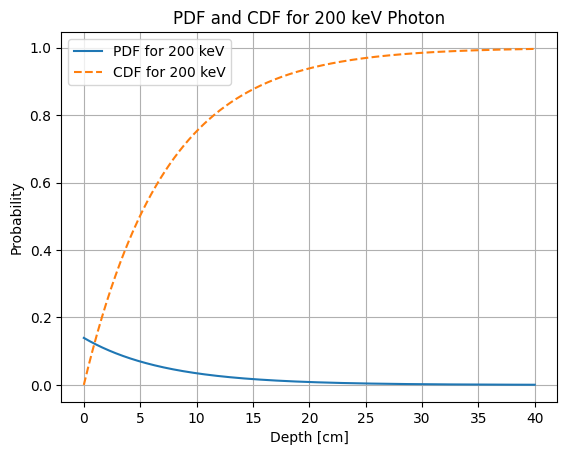

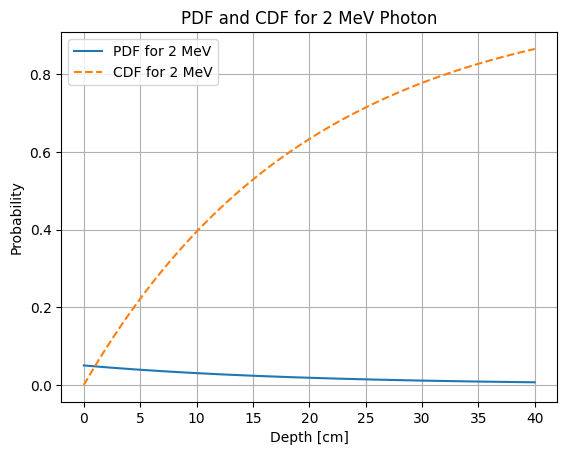

In [2]:
#2. Probability distributions
#PDF
def pdf(mu, x):
    return mu * np.exp(-mu * x)

#CDF
def cdf(mu, x):
    return 1 - np.exp(-mu * x)

#range of depths for the interaction
depths = np.linspace(0, 40, 1000) 

#Calculate PDF and CDF values for 200 keV and 2 MeV
pdf_200keV = pdf(mu_200keV, depths)
cdf_200keV = cdf(mu_200keV, depths)

pdf_2MeV = pdf(mu_2MeV, depths)
cdf_2MeV = cdf(mu_2MeV, depths)

plt.plot(depths, pdf_200keV, label="PDF for 200 keV")
plt.plot(depths, cdf_200keV, label="CDF for 200 keV", linestyle='dashed')
plt.xlabel('Depth [cm]')
plt.ylabel('Probability')
plt.title("PDF and CDF for 200 keV Photon")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(depths, pdf_2MeV, label="PDF for 2 MeV")
plt.plot(depths, cdf_2MeV, label="CDF for 2 MeV", linestyle='dashed')
plt.xlabel('Depth [cm]')
plt.ylabel('Probability')
plt.title("PDF and CDF for 2 MeV Photon")
plt.legend()
plt.grid(True)
plt.show()


3. Sampling photon steplengths using the inverse transform.

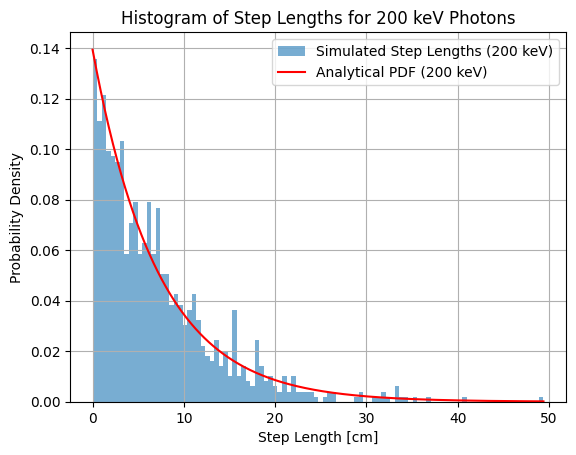

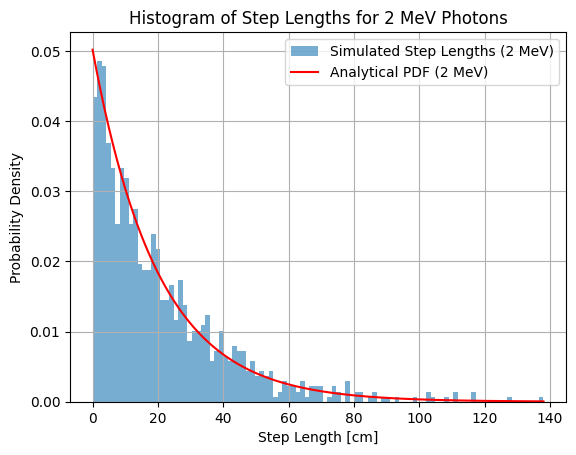

Mean step length (MC) for 200 keV: 7.010 cm
Mean free path (theoretical) for 200 keV: 7.172 cm
Difference: 0.162 cm
Mean step length (MC) for 2 MeV: 20.717 cm
Mean free path (theoretical) for 2 MeV: 19.919 cm
Difference: 0.798 cm


In [3]:
#3. Sampling photon steplengths using the inverse transform

#Inverse transform method to sample step lengths
def inverse_transform(mu, N=1000):
    U = np.random.uniform(0, 1, N) #generate N uniform random numbers between 0 and 1
    step_lengths = -np.log(1 - U) / mu 
    return step_lengths

N = 1000

step_lengths_200keV = inverse_transform(mu_200keV, N)
step_lengths_2MeV = inverse_transform(mu_2MeV, N)

plt.hist(step_lengths_200keV, bins=100, density=True, alpha=0.6, label="Simulated Step Lengths (200 keV)")
plt.xlabel('Step Length [cm]')
plt.ylabel('Probability Density')
plt.title('Histogram of Step Lengths for 200 keV Photons')
plt.grid(True)

depths_200kev = np.linspace(0, max(step_lengths_200keV), 1000)
pdf_200keV = pdf(mu_200keV, depths_200kev)
plt.plot(depths_200kev, pdf_200keV, 'r-', label="Analytical PDF (200 keV)")
plt.legend()
plt.show()

plt.hist(step_lengths_2MeV, bins=100, density=True, alpha=0.6, label="Simulated Step Lengths (2 MeV)")
plt.xlabel('Step Length [cm]')
plt.ylabel('Probability Density')
plt.title('Histogram of Step Lengths for 2 MeV Photons')
plt.grid(True)

depths_2MeV = np.linspace(0, max(step_lengths_2MeV), 1000)
pdf_2MeV = pdf(mu_2MeV, depths_2MeV)
plt.plot(depths_2MeV, pdf_2MeV, 'r-', label="Analytical PDF (2 MeV)")
plt.legend()
plt.show()

# Mean free path (MFP)
mfp_200keV = 1 / mu_200keV
mfp_2MeV = 1 / mu_2MeV

# Calculate mean MC step length
mean_mc_200keV = np.mean(step_lengths_200keV)
mean_mc_2MeV = np.mean(step_lengths_2MeV)

# Print comparison of mean MC step length and theoretical MFP
print(f"Mean step length (MC) for 200 keV: {mean_mc_200keV:.3f} cm")
print(f"Mean free path (theoretical) for 200 keV: {mfp_200keV:.3f} cm")
print(f"Difference: {abs(mean_mc_200keV - mfp_200keV):.3f} cm")

print(f"Mean step length (MC) for 2 MeV: {mean_mc_2MeV:.3f} cm")
print(f"Mean free path (theoretical) for 2 MeV: {mfp_2MeV:.3f} cm")
print(f"Difference: {abs(mean_mc_2MeV - mfp_2MeV):.3f} cm")


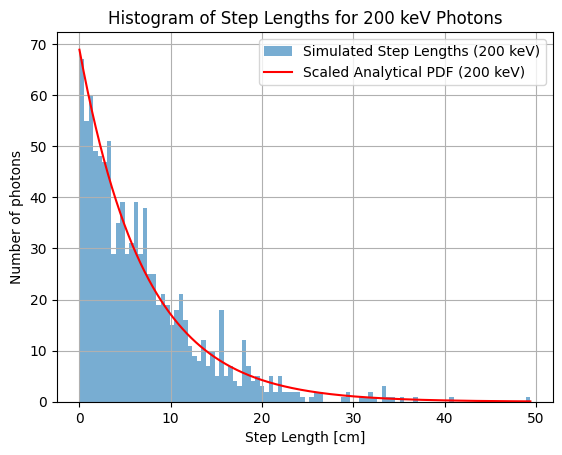

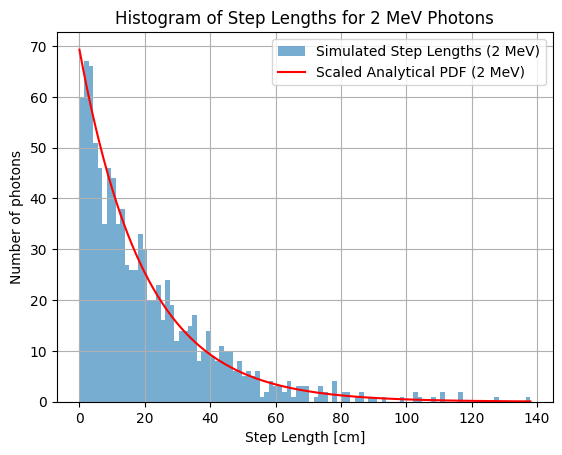

In [4]:
#Results from these plots are used in the report
plt.hist(step_lengths_200keV, bins=100, alpha=0.6, label="Simulated Step Lengths (200 keV)")
plt.xlabel('Step Length [cm]')
plt.ylabel('Number of photons')
plt.title('Histogram of Step Lengths for 200 keV Photons')
plt.grid(True)

#analytical PDF scaled by number of samples and bin width
bin_widths_200keV = (max(step_lengths_200keV)) / 100
scaled_pdf_200keV = pdf_200keV * N * bin_widths_200keV
plt.plot(depths_200kev, scaled_pdf_200keV, 'r-', label="Scaled Analytical PDF (200 keV)")
plt.legend()
plt.show()

plt.hist(step_lengths_2MeV, bins=100, alpha=0.6, label="Simulated Step Lengths (2 MeV)")
plt.xlabel('Step Length [cm]')
plt.ylabel('Number of photons')
plt.title('Histogram of Step Lengths for 2 MeV Photons')
plt.grid(True)

bin_widths_2MeV = (max(step_lengths_2MeV)) / 100
scaled_pdf_2MeV = pdf_2MeV * N * bin_widths_2MeV
plt.plot(depths_2MeV, scaled_pdf_2MeV, 'r-', label="Scaled Analytical PDF (2 MeV)")
plt.legend()
plt.show()

4. Normalized differential scattering cross section. 

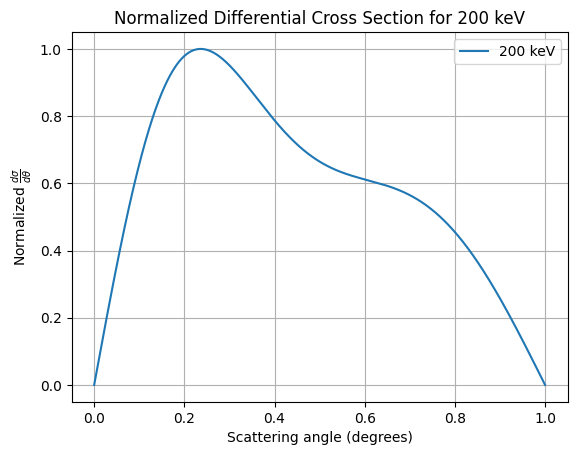

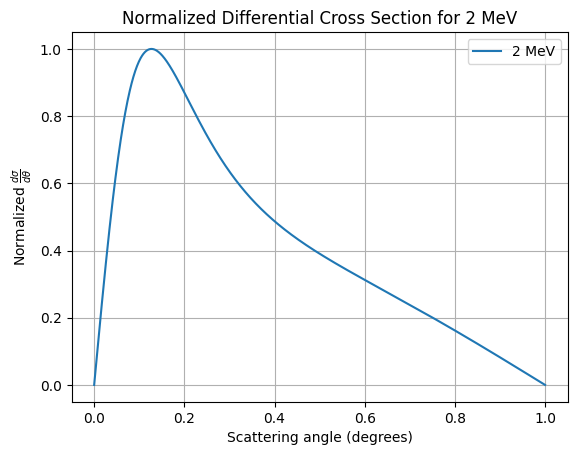

In [5]:
#4. Normalized differential scattering cross section. 
#Constants
mec2 = 0.511  #Electron rest mass energy in MeV
r = 2.818e-13  #Classical electron radius in cm

#the function to calculate differential cross section for Compton scattering
def dsigma_dtheta(E0, theta):
    E_prime = E0 / (1 + (E0 / mec2) * (1 - np.cos(theta))) # Scattered photon energy from Compton formula
    
    factor = np.pi*(r**2) * (E_prime / E0)**2 
    term1 = E_prime / E0
    term2 = E0 / E_prime
    cross_section = factor * (term1 + term2 - np.sin(theta)**2)*np.sin(theta) # Differential cross section formula
    return cross_section

# Normalize the cross section
def normalized_dsigma_dtheta(E0, theta):
    cross_sections = dsigma_dtheta(E0, theta)
    max_cross_section = np.max(cross_sections)
    return cross_sections / max_cross_section

E0_200keV = 0.2  # 200 keV
E0_2MeV = 2.0    # 2 MeV

# Scattering angles in radians
theta = np.linspace(0, np.pi, 1000)

norm_cs_200keV = normalized_dsigma_dtheta(E0_200keV, theta)
norm_cs_2MeV = normalized_dsigma_dtheta(E0_2MeV, theta)

plt.plot(np.degrees(theta)/180, norm_cs_200keV, label='200 keV')
plt.xlabel('Scattering angle (degrees)')
plt.ylabel('Normalized $\\frac{d\\sigma}{d\\theta}$')
plt.title('Normalized Differential Cross Section for 200 keV')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(np.degrees(theta)/180, norm_cs_2MeV, label='2 MeV')
plt.xlabel('Scattering angle (degrees)')
plt.ylabel('Normalized $\\frac{d\\sigma}{d\\theta}$')
plt.title('Normalized Differential Cross Section for 2 MeV')
plt.legend()
plt.grid(True)
plt.show()


5. Sampling Compton scattering angles using the rejection technique. 

/var/folders/sq/czqm3zt15lb2_07cs887bdnw0000gn/T/ipykernel_24482/1828855633.py:30: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theory_cs_normalized = theory_cs / np.trapz(theory_cs, angles)  #normalize theoretical cross-section


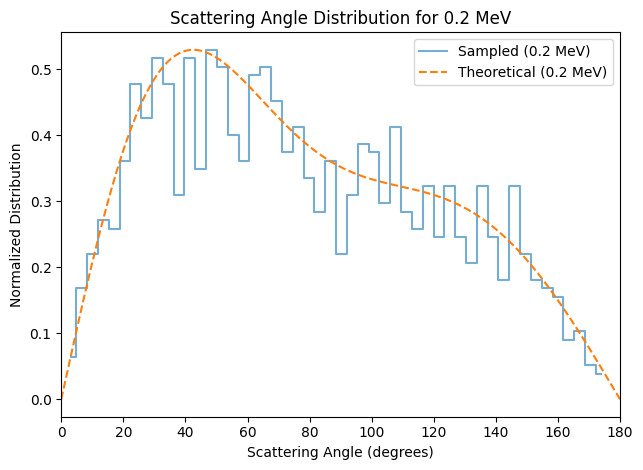

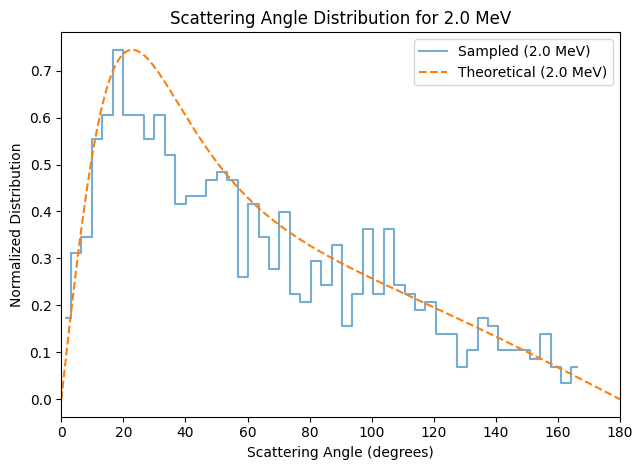

In [11]:
#5. Sampling Compton scattering angles using the rejection technique. 
nphotons = 1000  # Simulate 1000 photons

#rejection sampling function
def rejection_sampling(energy, angles, num_samples=nphotons):
    accepted = []
    norm_cs = normalized_dsigma_dtheta(energy, angles)  #normalized cross-section
    max_cs = np.max(norm_cs)  #normalize by max value
    num_attempts = num_samples*2

    for i in range(num_attempts):
        idx = np.random.randint(0, len(angles))
        angle = angles[idx]
        random_val = np.random.uniform(0, max_cs)
        if random_val <= norm_cs[idx]:
            accepted.append(angle)

    return np.array(accepted)


angles = np.linspace(0, np.pi, 1000)  #angles from 0 to pi radians
energies = [0.2, 2.0]  #photon energies 200 keV and 2 MeV

for energy in energies:
    sampled = rejection_sampling(energy, angles, nphotons)
    sampled_degrees = np.degrees(sampled)  #convert radians to degrees
    n, bins = np.histogram(sampled_degrees, bins=50, density=True) #compute histogram of sampled angles

    theory_cs = dsigma_dtheta(energy, angles) #compute theoretical cross-section
    theory_cs_normalized = theory_cs / np.trapz(theory_cs, angles)  #normalize theoretical cross-section

    #scaling histogram to match the maximum of the theoretical distribution
    histogram_max = np.max(n)  #max value of the histogram
    scale_factor = np.max(theory_cs_normalized) / histogram_max  #scale to match theoretical curve
    scaled_histogram = n * scale_factor  #scale the histogram

    plt.plot(bins[:-1], scaled_histogram, alpha=0.6, label=f'Sampled ({energy} MeV)', drawstyle='steps-mid')
    plt.plot(np.degrees(angles), theory_cs_normalized, '--', label=f'Theoretical ({energy} MeV)')

    plt.xlabel('Scattering Angle (degrees)')
    plt.ylabel('Normalized Distribution')
    plt.title(f'Scattering Angle Distribution for {energy} MeV')
    plt.legend()
    plt.tight_layout()
    plt.xlim(0, 180)
    plt.show()

6. Photon trajectory simulation.

/var/folders/sq/czqm3zt15lb2_07cs887bdnw0000gn/T/ipykernel_24482/3128224889.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pos[0] += dx  #Update x
/var/folders/sq/czqm3zt15lb2_07cs887bdnw0000gn/T/ipykernel_24482/3128224889.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pos[1] += dy  #Update y
/var/folders/sq/czqm3zt15lb2_07cs887bdnw0000gn/T/ipykernel_24482/3128224889.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pos[2] += dz  #Update z


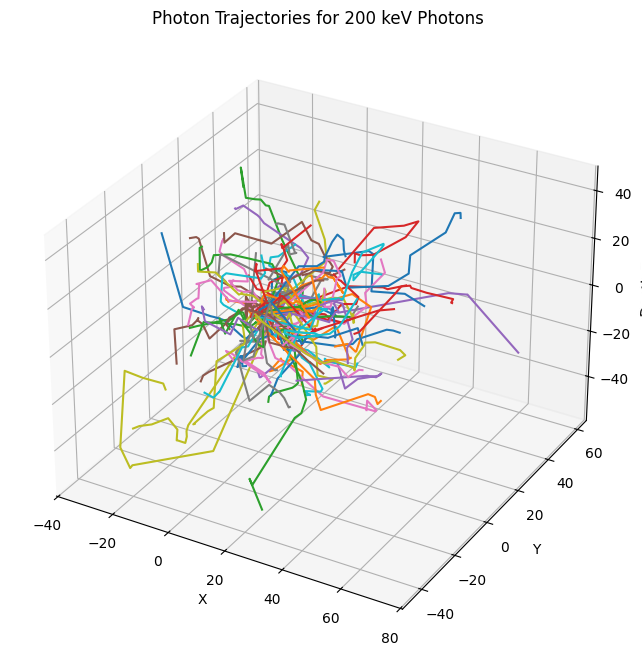

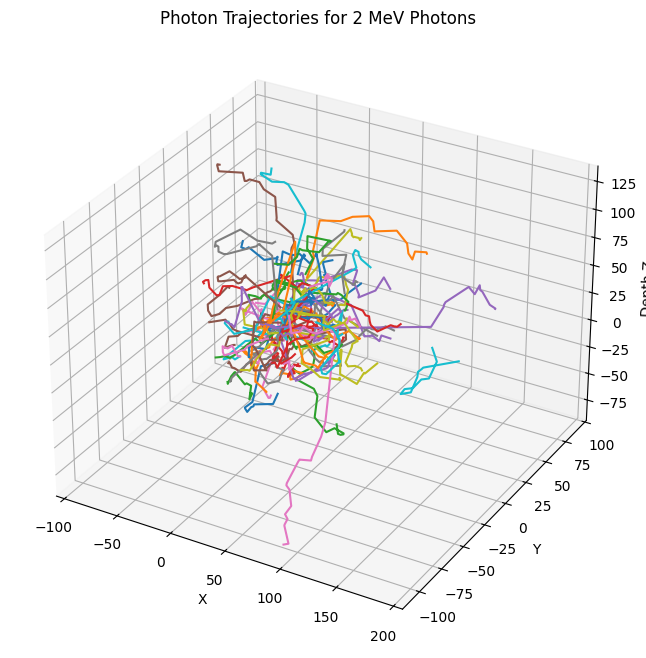

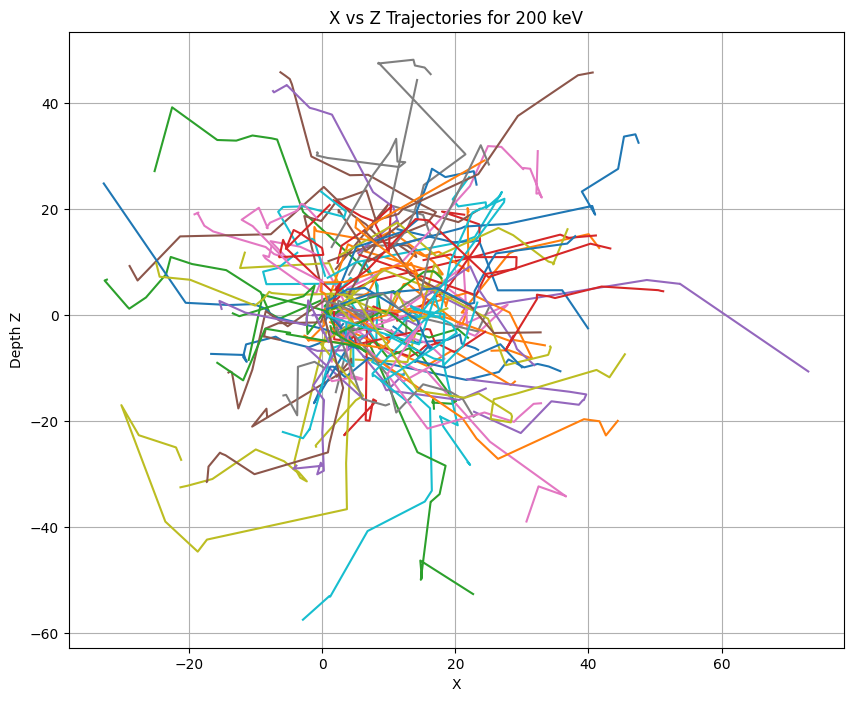

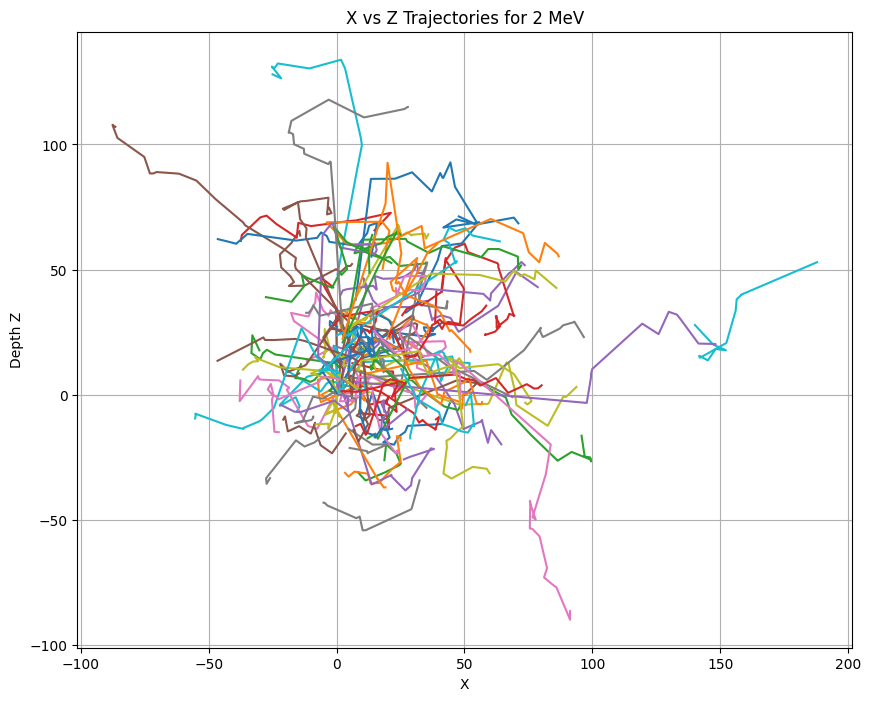

In [12]:
#6. Photon trajectory simulation.
from mpl_toolkits.mplot3d import Axes3D

cutoff_energy = 0.05  #50 keV cutoff
n_photons = 100  #Number of photons

def simulate_photon_trajectory(initial_energy, cutoff_energy):
    pos = np.zeros(3)  #Initial position (x, y, z)
    theta = 0.0 #Initial angles
    phi = 0.0 #Initial angles
    photon_path = []
    angles = np.linspace(0, np.pi, 1000)  #Angles for sampling 0 to pi

    while initial_energy > cutoff_energy:
        mu = attenuation_coefficient(initial_energy)  #Attenuation coefficient
        delta_s = inverse_transform(mu, 1)  #Sample interaction distance

        #Sample the scattering angle
        theta_s = rejection_sampling(initial_energy, angles, num_samples=1) #Generate scattering angle
        if len(theta_s) == 0:
            continue
        theta_s = theta_s[0]

        phi_s = np.random.uniform(0, 2 * np.pi)  #Random azimuthal angle

        #Calculating new angles using the formulas from lecture notes
        cos_theta_new = (np.sin(theta_s) * np.cos(phi_s) * np.sin(theta) + np.cos(theta_s) * np.cos(theta))
        theta_new = np.arccos(cos_theta_new)

        sin_phi = -np.sin(theta_s) * np.sin(phi_s) / np.sin(theta_new)
        phi_new = phi + np.arcsin(sin_phi)

        #Update position for each coordinate using formulas from lecture notes
        dx = delta_s * np.sin(theta_new) * np.cos(phi_new)
        dy = delta_s * np.sin(theta_new) * np.sin(phi_new)
        dz = delta_s * np.cos(theta_new)
        
        pos[0] += dx  #Update x
        pos[1] += dy  #Update y
        pos[2] += dz  #Update z
        
        photon_path.append((pos.copy(), initial_energy))

        #Update photon energy after Compton scattering
        E_prime = initial_energy / (1 + (initial_energy / m_0_c2) * (1 - np.cos(theta_s)))
        initial_energy = E_prime

        #Update angles for the next iteration
        theta = theta_new
        phi = phi_new

    return photon_path

def simulate_photons(n_photons, photon_energy, cutoff_energy):
    return [simulate_photon_trajectory(photon_energy, cutoff_energy) for i in range(n_photons)]

#Plotting
def plot_trajectories(photon_paths, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    for path in photon_paths:
        positions = np.array([p[0] for p in path])
        ax.plot(positions[:, 0], positions[:, 1], positions[:, 2])  #Plotting the 3D trajectory

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Depth Z')
    plt.title(title)
    plt.show()

def plot_2d_trajectories(photon_paths, title):
    plt.figure(figsize=(10, 8))
    
    for path in photon_paths:
        positions = np.array([p[0] for p in path])
        plt.plot(positions[:, 0], positions[:, 2])  #X vs Z

    plt.xlabel('X')
    plt.ylabel('Depth Z')
    plt.title(title)
    plt.grid(True)
    plt.show()

#Simulate for 200 keV and 2 MeV photons
photon_paths_200keV = simulate_photons(n_photons, 0.2, cutoff_energy)
photon_paths_2MeV = simulate_photons(n_photons, 2.0, cutoff_energy)

plot_trajectories(photon_paths_200keV, 'Photon Trajectories for 200 keV Photons')
plot_trajectories(photon_paths_2MeV, 'Photon Trajectories for 2 MeV Photons')

plot_2d_trajectories(photon_paths_200keV, 'X vs Z Trajectories for 200 keV')
plot_2d_trajectories(photon_paths_2MeV, 'X vs Z Trajectories for 2 MeV')

